In [1]:
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as po
import matplotlib.pyplot as plt
import seaborn

In [3]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10)

In [4]:
data = po.DataFrame(np.c_[y, X], columns=['var_'+str(col) for col in range(21)])

In [5]:
data.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20
0,1.0,-0.064632,-3.097130,0.758799,1.631582,2.624432,-0.739933,-0.351206,5.465251,-0.068142,...,-1.732452,-0.638607,2.089957,3.581400,1.292548,-0.545499,1.083748,0.736153,4.516272,-1.489436
1,1.0,-0.277129,-0.646765,1.616495,-1.244934,2.108598,-2.880313,-0.527571,0.595653,-0.566879,...,1.679364,-0.648365,-1.425213,-2.516959,1.179006,-0.421994,0.374405,0.452658,0.752482,-0.773235
2,0.0,-1.120957,-0.901219,-2.179545,-2.369581,0.053410,-1.872803,-0.243568,0.212189,-1.830228,...,1.010233,0.334476,-1.077451,-0.987625,0.044717,0.952514,0.270799,1.505249,-2.581431,1.693188
3,1.0,1.107250,-0.646758,-2.277648,-0.336442,4.972769,-4.037166,0.027244,0.248343,-3.282488,...,0.072675,0.317958,-2.220287,-1.474027,0.390861,0.321564,0.199101,-0.059434,1.361435,0.759479
4,0.0,-1.591930,0.750893,0.151177,-1.410543,0.921478,0.092675,1.588495,-4.025676,0.437467,...,0.355665,-1.414510,-3.569304,-1.097829,-0.807621,-1.169022,-0.180751,0.377660,2.839244,-0.137239


In [6]:
data.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.497000,0.011649,-0.966108,0.022717,-0.440846,0.618521,-0.422048,-0.058781,0.003930,-0.985722,...,-0.043746,0.032076,-1.089711,-0.093790,0.037340,0.040564,0.027353,1.013586,0.091995,-0.024540
std,0.500241,1.005516,1.640822,1.023351,1.989533,2.916828,2.015035,1.817219,2.066655,1.782952,...,0.992042,1.025805,1.823313,2.044849,0.977674,1.004017,1.045464,1.640804,2.239836,1.004655
min,0.000000,-3.050987,-6.901126,-3.128194,-6.379231,-8.531063,-6.865949,-5.537159,-6.072918,-7.813373,...,-3.645172,-3.208451,-7.706180,-6.264131,-3.016215,-3.473799,-3.224148,-5.030304,-6.664790,-3.410428
25%,0.000000,-0.682422,-2.001704,-0.695904,-1.812206,-1.288527,-1.804616,-1.229958,-1.365923,-2.077602,...,-0.742967,-0.657471,-2.257243,-1.460912,-0.617955,-0.634574,-0.722487,-0.028928,-1.514714,-0.761662
50%,0.000000,-0.008411,-0.958757,0.015461,-0.415617,0.841051,-0.443530,-0.036113,-0.094930,-1.009018,...,-0.057391,0.030960,-1.072374,-0.137677,0.020947,0.083524,0.028311,1.046045,0.022118,-0.033298
75%,1.000000,0.721592,0.047300,0.705003,0.891595,2.678695,1.028438,1.185635,1.353550,0.216376,...,0.657870,0.679758,0.168828,1.302584,0.707486,0.736269,0.746191,2.075493,1.653382,0.687585
max,1.000000,2.902623,4.050810,3.735604,6.242395,9.362071,6.132026,6.188791,8.476195,5.890207,...,2.925863,3.504660,4.900856,6.596785,3.075725,3.142090,3.675263,7.820679,7.205640,3.701774


In [7]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc

C:\Continuum\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [8]:
model = sm.Logit(data['var_0'], data.iloc[:,1:]).fit()

         Current function value: 0.494875
         Iterations: 35


C:\Continuum\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [9]:
model.summary()

C:\Continuum\lib\site-packages\statsmodels\base\model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
C:\Continuum\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Continuum\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Continuum\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  var_0   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      982
Method:                           MLE   Df Model:                           17
Date:                Sat, 28 Oct 2017   Pseudo R-squ.:                  0.2860
Time:                        22:04:03   Log-Likelihood:                -494.88
converged:                      False   LL-Null:                       -693.13
                                        LLR p-value:                 9.957e-74
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
var_1          0.1313      0.079      1.663      0.096      -0.023       0.286
var_2          0.1023   8.28e+05   1.24e-07      1.000   -1.62e+06    1.62e+06
var_3         -0.0191      0.077     -0.247      0.805      -0.171       0.133
var_4         -0.4020    4.1e+05   -9.8e-07      1.000   -8.04e+05    8.04e+05
var_5          0.2187   1.36e+06    1.6e-07      1.000   -2.67e+06    2.67e+06
var_6         -0.1925   4.31e+05  -4.46e-07      1.000   -8.46e+05    8.46e+05
var_7         -0.0091        nan        nan        nan         nan         nan
var_8          0.3835   1.55e+06   2.48e-07      1.000   -3.03e+06    3.03e+06
var_9          0.0909        nan        nan        nan         nan         nan
var_10        -0.1372        nan        nan        nan         nan         nan
var_11        -0.1348      0.080     -1.690      0.091      -0.291       0.022
var_12        -0.1751      0.077     -2.276      0.023      -0.326      -0.024
var_13         0.0764   4.06e+05   1.88e-07      1.000   -7.95e+05    7.95e+05
var_14        -0.0036        nan        nan        nan         nan         nan
var_15        -0.0540      0.080     -0.672      0.501      -0.211       0.103
var_16         0.0342      0.080      0.426      0.670      -0.123       0.191
var_17         0.0408      0.075      0.541      0.589      -0.107       0.189
var_18        -0.0315        nan        nan        nan         nan         nan
var_19        -0.0016   6.32e+05  -2.54e-09      1.000   -1.24e+06    1.24e+06
var_20        -0.0633      0.079     -0.798      0.425      -0.219       0.092
==============================================================================
"""

In [10]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
y_pred = model.predict_proba(data.iloc[:,1:])[:, 1]
y_pred1 = model.predict(data.iloc[:,1:])

In [12]:
confusion_matrix(data['var_0'], y_pred1)

array([[382, 121],
       [120, 377]])

In [13]:
fpr, tpr, _ = roc_curve(data['var_0'], y_pred)
roc_auc = auc(fpr, tpr)

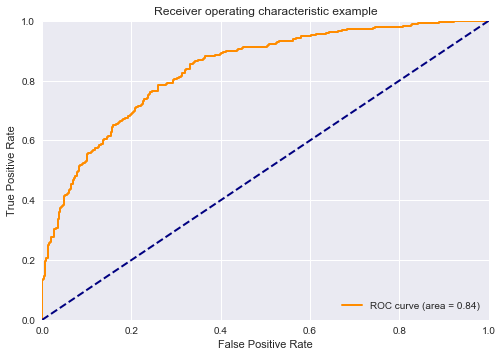

In [14]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [19]:
#model1 = LogisticRegression()
#model1.fit(data[['var_8','var_15']], data['var_0'])
model1 = sm.Logit(data['var_0'], data[['var_11', 'var_12']]).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.689776
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  var_0   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                            1
Date:                Sat, 28 Oct 2017   Pseudo R-squ.:                0.004837
Time:                        22:05:42   Log-Likelihood:                -689.78
converged:                       True   LL-Null:                       -693.13
                                        LLR p-value:                  0.009612
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
var_11        -0.1282      0.064     -1.997      0.046      -0.254      -0.002
var_12        -0.1054      0.062     -1.697      0.090      -0.227       0.016
==============================================================================
"""

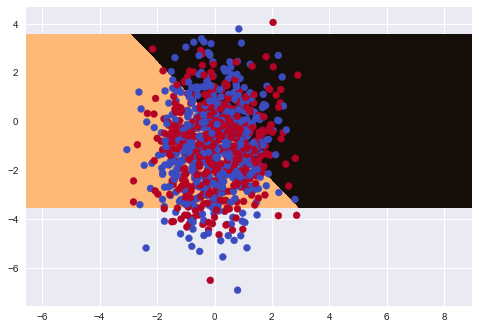

In [20]:
# Set min and max values and give it some padding
x_min, x_max = data['var_8'].min() - .5, data['var_8'].max() + .5
y_min, y_max = data['var_15'].min() - .5, data['var_15'].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
Z = model1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
plt.contourf(xx, yy, np.round(Z), cmap=plt.cm.copper)
plt.scatter(X[:, 0], X[:, 1], c=data['var_0'], cmap=plt.cm.coolwarm)